# EDA Example Student Performance

This is an example for performing a EDA on a dataset about student performance

### Step 1: Loading Data and Libraries

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
filename = "StudentsPerformance.csv"
df = pd.read_csv(filename)

### Step 2: first look at the data

In [3]:
# df has 1000 observations and 8 variables
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
df.isnull().sum(axis = 0)

male                           0
lunch_free/reduced             0
prep_course_completed          0
race/ethnicity                 0
parental level of education    0
math score                     0
reading score                  0
writing score                  0
avg score                      0
dtype: int64

There are no missing values

### Step 3: Feature Engineering

#### Create Average Score

In [5]:
# Performance is given in three different dimensions (math, reading and writing)
# Create an average score
df["avg score"] = round((df["math score"] + df["reading score"] + df["writing score"])/3,2)

In [6]:
#df_backup = df

#### Preprocess Categorical Variables
gender, race/ethnicity, parental level of education, lunch, test preparation course

gender

In [7]:
male = pd.get_dummies(df["gender"])[["male"]]
df = pd.concat((df, male), axis = 1, ignore_index = False)
df.drop(columns = "gender", inplace = True)

race/ethnicity

In [8]:
# race/ethnicity
race_unique = list(df["race/ethnicity"].unique())
race_unique[0] = "group A"
race_unique[1] = "group B"
race_unique[2] = "group C"
race_unique# we have 5 groups

['group A', 'group B', 'group C', 'group D', 'group E']

In [9]:
df["race/ethnicity"] = pd.Categorical(df["race/ethnicity"], race_unique, ordered=False)

parental level of education

In [10]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
Parent_edu_levels_unique = ["some high school","high school","some college","associate's degree","bachelor's degree","master's degree"]

In [12]:
df["parental level of education"] = pd.Categorical(df["parental level of education"], Parent_edu_levels_unique, ordered = True)

lunch

In [13]:
lunch_disc = pd.get_dummies(df["lunch"])[["free/reduced"]]
df = pd.concat((df,lunch_disc), axis = 1, ignore_index = False)
df.drop(columns = "lunch", inplace = True)
df.rename(columns = {"free/reduced": "lunch_free/reduced"}, inplace = True)

test preperation course

In [14]:
df["test preparation course"].unique()
prep_complete = pd.get_dummies(df["test preparation course"])[["completed"]]

In [15]:
df = pd.concat((df,prep_complete),axis = 1, ignore_index = False)
df.drop(columns = "test preparation course", inplace = True)
df.rename(columns = {"completed": "prep_course_completed"}, inplace = True)

Reorder columns in dataframe

In [16]:
cols = df.columns.tolist()

In [17]:
cols = cols[-3:] + cols [:-3]

In [18]:
df = df[cols]

# let's have a look at the adjusted dataframe

df.head()

,male,lunch_free/reduced,prep_course_completed,race/ethnicity,parental level of education,math score,reading score,writing score,avg score
0,0,0,0,group B,bachelor's degree,72,72,74,72.67
1,0,0,1,group C,some college,69,90,88,82.33
2,0,0,0,group B,master's degree,90,95,93,92.67
3,1,1,0,group A,associate's degree,47,57,44,49.33
4,1,0,0,group C,some college,76,78,75,76.33






### Step4: individual distributions

descriptive statistics

In [19]:
df[["math score","reading score","writing score","avg score"]].describe()

,math score,reading score,writing score,avg score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


#### Categorical Variables

Dummies: male, lunch_free/reduced, prep_course_completed

In [20]:
df["male"].value_counts()

0    518
1    482
Name: male, dtype: int64

In [21]:
df["lunch_free/reduced"].value_counts()

0    645
1    355
Name: lunch_free/reduced, dtype: int64

In [22]:
df["prep_course_completed"].value_counts()

0    642
1    358
Name: prep_course_completed, dtype: int64

Race/Ethnicity

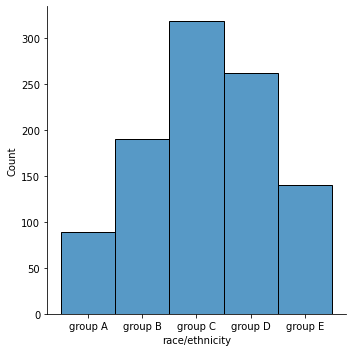

In [23]:
sns.displot(df, x = "race/ethnicity")
plt.show()

In [62]:
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [70]:
df["race/ethnicity"].value_counts()/df.shape[0]*100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

parental level of education

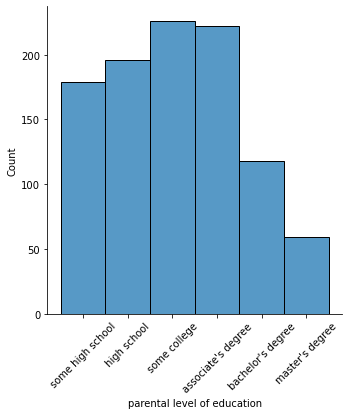

In [25]:
sns.displot(df, x = "parental level of education")
plt.xticks(rotation = 45)

plt.show()

In [26]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [72]:
df["parental level of education"].value_counts()/df.shape[0]*100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

#### Continuous Variables (Scores)

math score

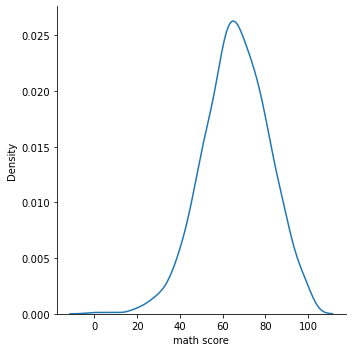

In [27]:
sns.displot(df, x = "math score", kind = "kde")
plt.show()

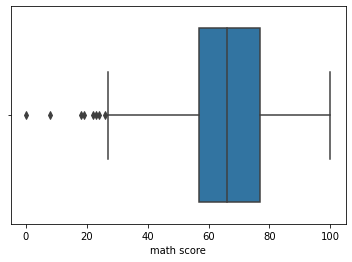

In [54]:
sns.boxplot(x = "math score", data = df)
plt.show()

reading score

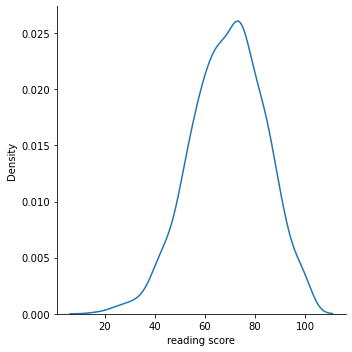

In [28]:
sns.displot(df, x = "reading score", kind = "kde")
plt.show()

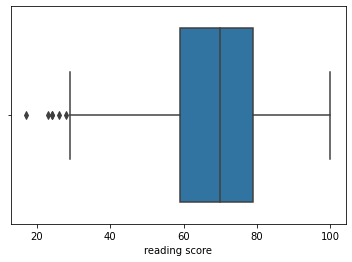

In [55]:
sns.boxplot(x = "reading score", data = df)
plt.show()

writing score

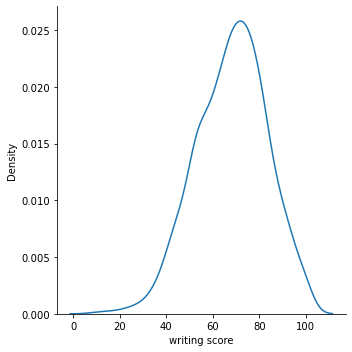

In [29]:
sns.displot(df, x = "writing score", kind = "kde")
plt.show()

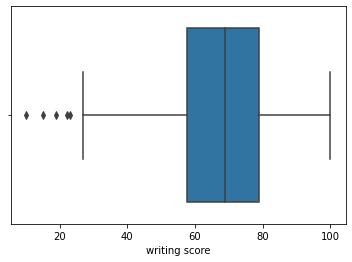

In [56]:
sns.boxplot(x = "writing score", data = df)
plt.show()

avg score

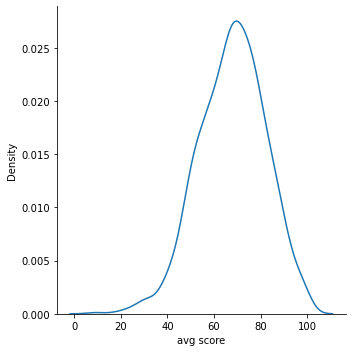

In [30]:
sns.displot(df, x = "avg score", kind = "kde")
plt.show()

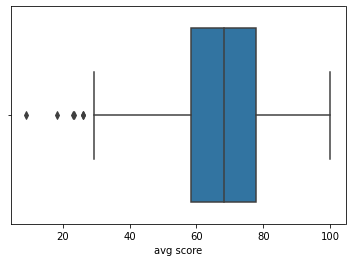

In [57]:
sns.boxplot(x = "avg score", data = df)
plt.show()

#### Key Insights:

All score variables have similar means and standard deviations. For further analysis it should be considered to choose the average score as target variable

Some racial/ethnical groups are to be found considerably more often than others in the data set.

Parents with a bachelor's or master's degree are overall more uncommon.

Only about 1/3 of the individuals received a free or reduced lunch and also about 1/3 completed the preperation course.

Gender distribution is roughly even.

### Step 5: Correlations

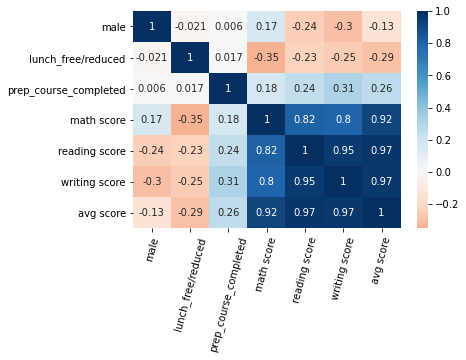

In [58]:
corr = df.corr()
sns.heatmap(corr, center = 0, annot = True, cmap ="RdBu" )
plt.xticks(rotation = 75)
plt.show()

Test scores have a strong correlation

being male as well as receiving free or reduced lunch is weakly correlated with lower test scores (except for male - math)

completing the prep_course is weakly correlated with higher test scores

note: ethnicity and parental education levels are not examined in this plot. We would need to represent this data as dummies

#### Race & Parental Education

Race/Ethnicity

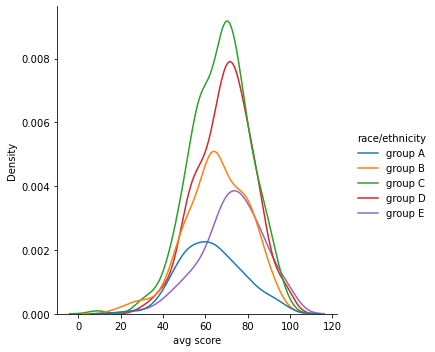

In [32]:
sns.displot(df, x = "avg score", hue = "race/ethnicity", kind = "kde")
plt.show()

In [33]:
df[["race/ethnicity","avg score"]].groupby("race/ethnicity").mean()

,avg score
race/ethnicity,
group A,62.992135
group B,65.468579
group C,67.131567
group D,69.179389
group E,72.752000


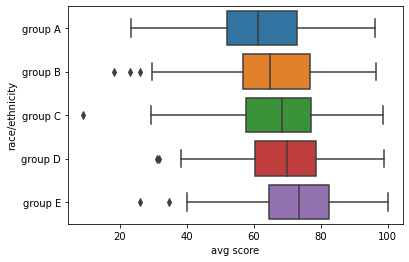

In [60]:
sns.boxplot(x = "avg score", y = "race/ethnicity", data = df)
plt.show()

The mean test score increases from group A to E. The difference between A (63) and E (73) is more than half a standard deviation of the overall avg score (~14)

Parental Level of Education

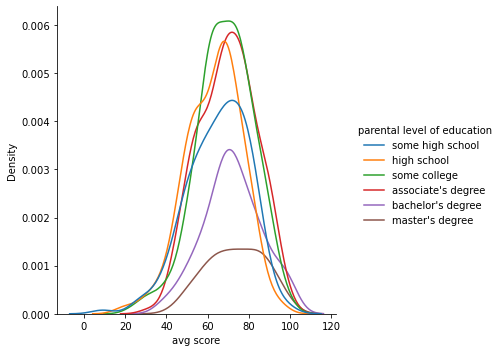

In [34]:
sns.displot(df, x = "avg score", hue = "parental level of education", kind = "kde")
plt.show()

In [35]:
df[["parental level of education","avg score"]].groupby("parental level of education").mean()

,avg score
parental level of education,
some high school,65.107654
high school,63.097194
some college,68.476106
associate's degree,69.568964
bachelor's degree,71.923983
master's degree,73.598644


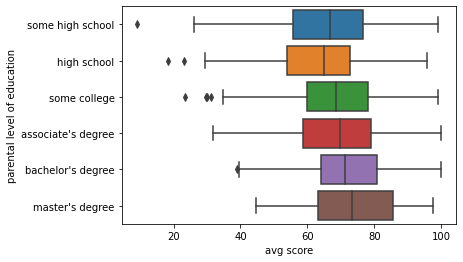

In [71]:
sns.boxplot(x = "avg score", y = "parental level of education", data = df)
plt.show()

The mean of the average test score increases with parental level of education (except for some high school - high school)

In [36]:
df_race_paredu = df[["race/ethnicity","parental level of education", "avg score"]].groupby(["parental level of education","race/ethnicity"], as_index = False).mean()

In [37]:
df_race_paredu.pivot(index="parental level of education", columns = "race/ethnicity")

avg score                                   \
race/ethnicity                 group A    group B    group C    group D   
parental level of education                                               
some high school             59.860417  64.289211  63.156327  68.612800   
high school                  61.278333  61.500000  62.328125  63.478182   
some college                 64.887222  64.378649  67.806522  70.437612   
associate's degree           63.880714  67.975610  69.376282  69.333400   
bachelor's degree            67.861667  71.301500  73.241250  69.869286   
master's degree              63.333333  74.833333  69.034737  76.477826   

                                        
race/ethnicity                 group E  
parental level of education             
some high school             69.407222  
high school                  69.545455  
some college                 72.218571  
associate's degree           73.973333  
bachelor's degree            75.592778  
master's degree              79.083750

C:\Users\49152\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


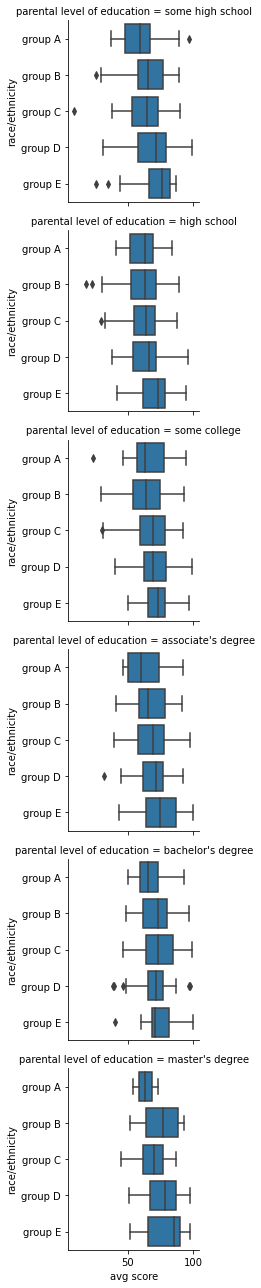

In [85]:
g = sns.FacetGrid(df, row = "parental level of education")
g = g.map(sns.boxplot, "avg score", "race/ethnicity")

Mean scores by parental level of education differ for racial groups. Thus, it is unlikely that a different distribution of parental level of edcuation fully explains the differences observed by racial groups.

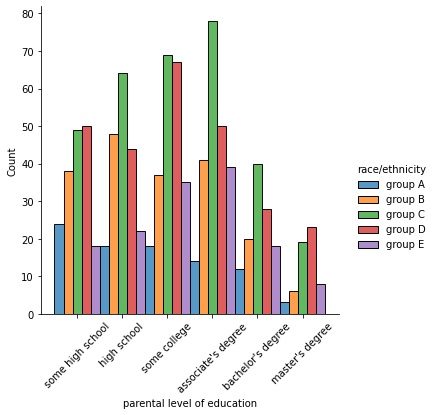

In [38]:
# Does the distribution of parental level of education depend on race/ethnicity?

sns.displot(df, x = "parental level of education", hue = "race/ethnicity", multiple = "dodge")
plt.xticks(rotation = 45)
plt.show()

In [97]:
race_count = {"group A": 0, "group B": 0, "group C": 0, "group D": 0, "group E": 0}


for race in race_unique:
    x = df.groupby("race/ethnicity")["parental level of education"].value_counts()[race].sum()
    race_count[race] = x
    
race_count

{'group A': 89, 'group B': 190, 'group C': 319, 'group D': 262, 'group E': 140}

In [104]:
for race in race_unique:
    z = round(df.groupby("race/ethnicity")["parental level of education"].value_counts()[race]/race_count[race]*100, 2)
    print(race)
    print(z, "\n\n")

group A
parental level of education
some high school      26.97
high school           20.22
some college          20.22
associate's degree    15.73
bachelor's degree     13.48
master's degree        3.37
Name: parental level of education, dtype: float64 


group B
parental level of education
high school           25.26
associate's degree    21.58
some high school      20.00
some college          19.47
bachelor's degree     10.53
master's degree        3.16
Name: parental level of education, dtype: float64 


group C
parental level of education
associate's degree    24.45
some college          21.63
high school           20.06
some high school      15.36
bachelor's degree     12.54
master's degree        5.96
Name: parental level of education, dtype: float64 


group D
parental level of education
some college          25.57
some high school      19.08
associate's degree    19.08
high school           16.79
bachelor's degree     10.69
master's degree        8.78
Name: parental level of e

#### Key insights:

being male as well as receiving free or reduced lunch is weakly correlated with lower test scores

completing the prep_course is weakly correlated with higher test scores